In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams["figure.facecolor"] = 'lightgray'
matplotlib.rcParams["axes.facecolor"] = 'lightgray'
matplotlib.rcParams["savefig.facecolor"] = 'lightgray'

### Initial array

In [3]:
x = np.linspace(-20, 20, num=200)
# print(x)

# **Activation functions**

---
## **1. ReLU activation function**

### $f(x) = \frac{x + |x|}{2}$

In [4]:
def relu(x):
    return (x + np.abs(x)) / 2

In [5]:
y = relu(x)
# print(y)

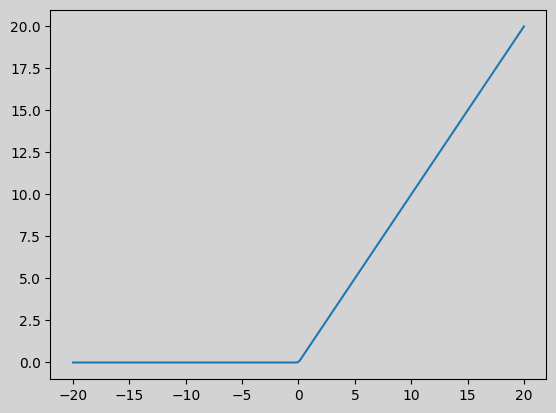

In [6]:
plt.plot(x, y)
plt.show()

### **ReLU derivative (signum function)**

### $f'(x) = \frac{x + |x|}{2x}$

In [7]:
def relu_derivative(x):
    return (x > 0).astype(np.int32)

In [8]:
y = relu_derivative(x)
# print(y)

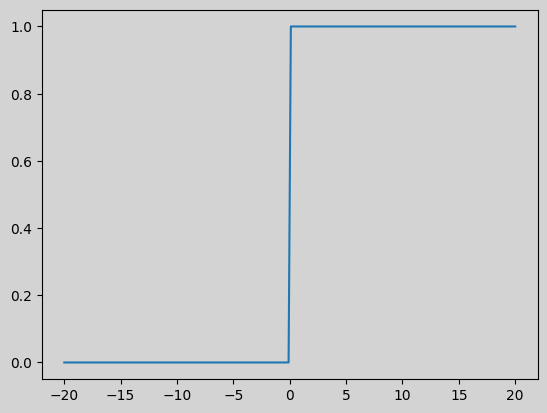

In [9]:
plt.plot(x, y)
plt.show()

---
## **2. Softplus activation function**

### $f(x) = ln(1+e^x)$

In [10]:
def softplus(x):
    return np.log(1+np.exp(x))

In [11]:
y = softplus(x)
# print(y)

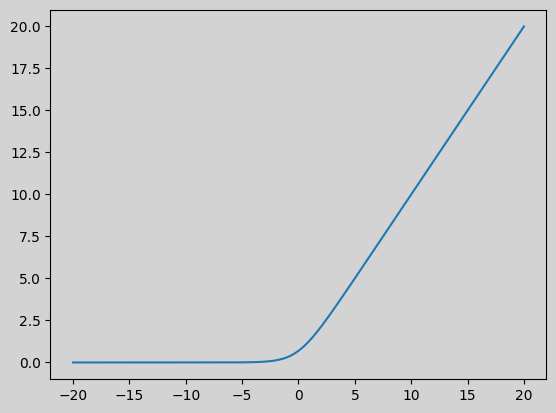

In [12]:
plt.plot(x, y)
plt.show()

### **Softplus derivative (sigmoid function)**

### $f'(x) = \frac{1}{1+e^{-x}}$

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
y = sigmoid(x)
# print(y)

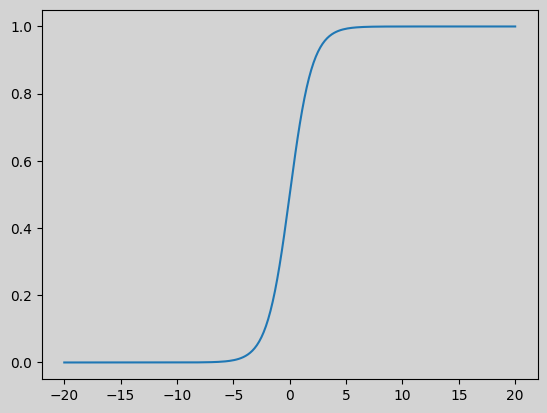

In [15]:
plt.plot(x, y)
plt.show()

---
## **3. Mish activation function**

### $f(x) = x \cdot tanh(softplus(x)) = x \cdot tanh(ln(1+e^x))$

In [16]:
def mish(x):
    return x * np.tanh(softplus(x))

In [17]:
y = mish(x)
# print(y)

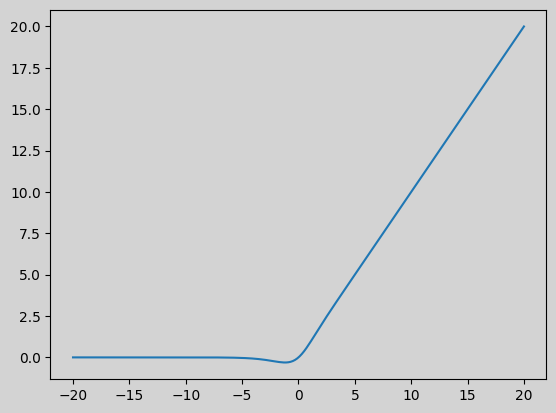

In [18]:
plt.plot(x, y)
plt.show()

### **Mish derivative $f'(x) = \frac{e^x\omega}{\delta^2}$**

#### $\omega = 4(x+1)+4e^{2x}+e^{3x}+e^x(4x+6)$, &emsp; $\sigma = 2e^{x}+e^{2x}+2$

In [19]:
def mish_derivative(x):
    omega = 4*(x+1) + 4*np.exp(2*x) + np.exp(3*x) + np.exp(x)*(4*x+6)
    delta = 2*np.exp(x) + np.exp(2*x) + 2
    return np.exp(x)*omega / delta**2

In [20]:
y = mish_derivative(x)
# print(y)

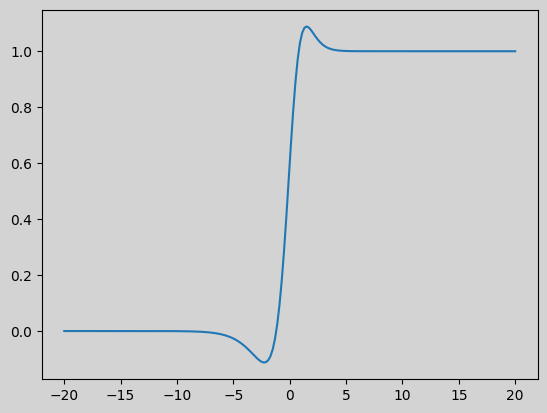

In [21]:
plt.plot(x, y)
plt.show()

---
## **4. Swish activation function**

### $f(x) = x \cdot sigmoid(\beta x)$

In [22]:
def swish(x, beta=1):
    return x * sigmoid(beta*x)

In [23]:
y = swish(x)
# print(y)

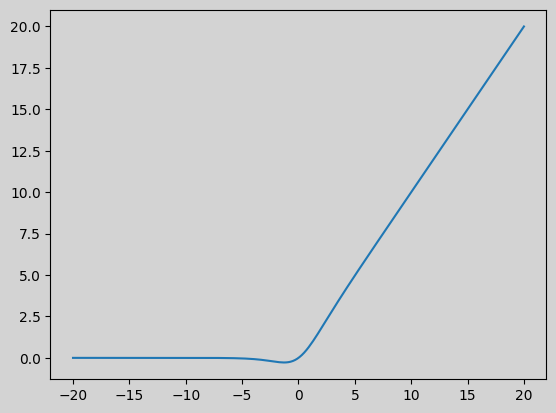

In [24]:
plt.plot(x, y)
plt.show()

### **Swish derivative**

#### $f'(x) = \beta f(\beta x) + sigmoid(\beta x) \cdot (1 - \beta f(\beta x))$

In [25]:
def swish_derivative(x, beta=1):
    return beta*swish(beta*x) + sigmoid(beta*x) * (1-beta*swish(beta*x))

In [26]:
y = swish_derivative(x)
# print(y)

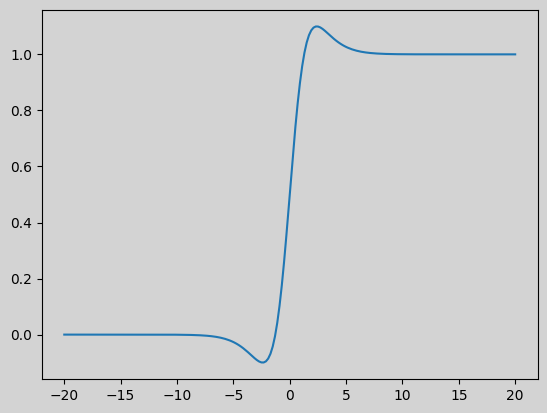

In [27]:
plt.plot(x, y)
plt.show()

---
## **5. ELU activation function**

### $f(x) = \alpha (e^x - 1),$ &nbsp; $x \le 0$
### &emsp;&emsp;&emsp;&nbsp;&nbsp; $x,$ &nbsp; $x > 0$

In [28]:
def ELU(x, alpha=0.1):
    if x <= 0:
        return alpha * (np.exp(x) - 1)
    return x

In [29]:
y = np.array(list(map(ELU, x)))
# print(y)

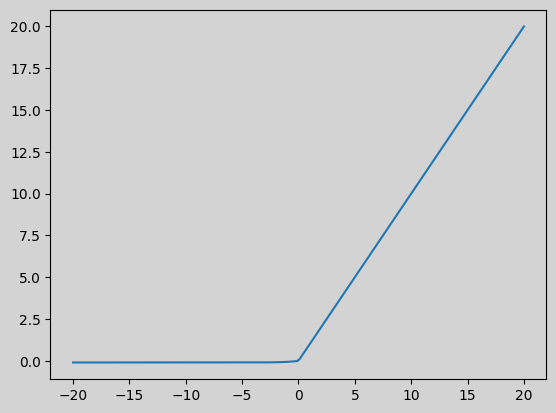

In [30]:
plt.plot(x, y)
plt.show()

---
# **Loss functions**

In [42]:
y_true = np.random.rand(200)
y_pred = np.random.rand(200)
z = np.sort(y_true - y_pred)

# print(y_true, "\n")
# print(y_pred)

---
## **1. SE (Squared Error)**

### $SE = (y_{true} - y_{pred})^2$

In [43]:
def SE(y_true, y_pred):
    return (np.sort(y_true - y_pred))**2

In [44]:
se = SE(y_true, y_pred)
# print(se)

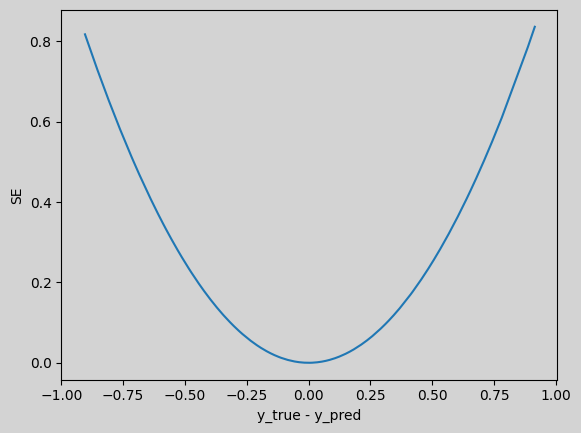

In [53]:
plt.plot(np.sort(y_true - y_pred), se)
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("y_true - y_pred")
plt.ylabel("SE")
plt.show()

---
## **2. L1 (Absolute Error)**

### $L1 = |y_{true} - y_{pred}|$

In [54]:
def L1(y_true, y_pred):
    return np.abs(np.sort(y_true - y_pred))

In [55]:
l1 = L1(y_true, y_pred)
# print(l1)

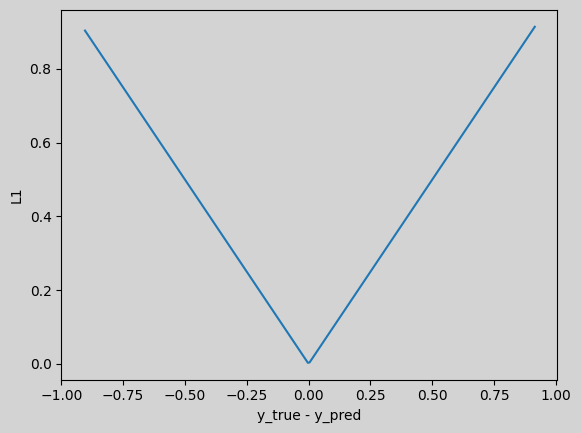

In [56]:
plt.plot(np.sort(y_true - y_pred), l1)
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.xlabel("y_true - y_pred")
plt.ylabel("L1")
plt.show()

---
## **3. Huber (Combination of SE and L1)**

### $\begin{cases}\frac{1}{2} z^2 , & z \leqslant 0 \\ \delta|z|-\frac{1}{2} \delta^2, & z>0, \quad z=y_{\text {true }}-y_{\text {pred }}\end{cases}$

In [49]:
def Huber(y_true, y_pred, delta=0.5):
    z = np.sort(y_true - y_pred)
    quadratic = z**2 / 2
    linear = delta * np.abs(z) - delta**2 / 2
    huber = np.where(np.abs(z) <= delta, quadratic, linear)
    
    return huber

In [68]:
delta = 0.5
huber = Huber(y_true, y_pred, delta=delta)
# print(huber)

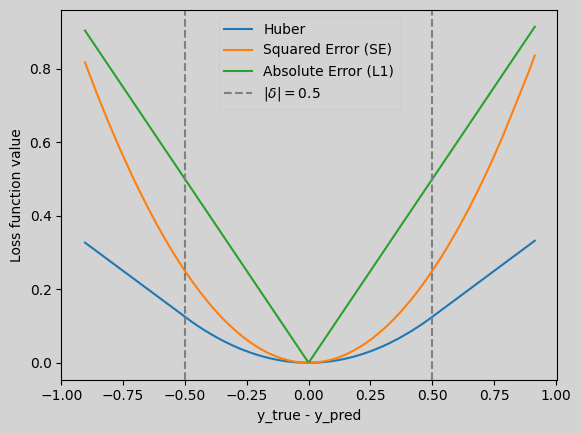

In [71]:
plt.plot(z, huber, label='Huber')
plt.plot(z, se, label='Squared Error (SE)')
plt.plot(z, l1, label='Absolute Error (L1)')
plt.axvline(x=-delta, linestyle='dashed', color='gray', label=f'$|\delta|={delta}$')
plt.axvline(x=delta, linestyle='dashed', color='gray')
plt.xticks(np.arange(-1, 1.25, step=0.25))
plt.legend()
plt.xlabel("y_true - y_pred")
plt.ylabel("Loss function value")
plt.show()